In [1]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss, precision_recall_curve
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [2]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [3]:
# import state data => no header, so you have to specify header=None
y_name = ["state"]
y_train = pd.read_csv("./y_train.csv", names=y_name, header=None)
y_val = pd.read_csv("./y_val.csv", names=y_name, header=None)

In [4]:
# flatten 1-column dataframe into series
y_train = y_train['state']
y_val = y_val['state']

In [22]:
x_train

,usd_goal_real,duration_days,goal*days,name_word_count,name_sentiment,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,tfidf_writing,tfidf_year,tfidf_yoga,tfidf_york,tfidf_young,tfidf_youth,tfidf_youtube,tfidf_zero,tfidf_zine,tfidf_zombie
0,-0.028903,0.321283,-0.025573,1.201415,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.031967,-0.781446,-0.030058,0.122991,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.037697,1.975377,-0.032591,-0.955432,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.038133,-0.308848,-0.033212,-0.595958,0.000000,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.028249,2.054143,-0.020136,0.841941,0.136364,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.034493,-0.308848,-0.030855,-0.955432,0.000000,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.035984,-0.308848,-0.031820,-0.595958,0.000000,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.034959,-1.332811,-0.032103,-0.595958,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.007475,-0.308848,-0.013365,0.482466,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.037036,0.084984,-0.032370,-1.674382,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object (using linearsvc to handle large number of instances better)
clf = svm.LinearSVC(dual=False,max_iter=10000)

# LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     # intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     # multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     # verbose=0)

In [111]:
# from sklearn.svm import SVC
# clf = SVC()

In [112]:
clf.fit(x_train, y_train)
# clf.score(x_train[vals], y_train)
#Predict Output
# predicted= model.predict(x_test)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [113]:
print(clf.coef_)

[[-4.16249052 -0.10262597  0.48711241 ...  0.22895466  0.74238127
  -0.31668184]]


In [114]:
print(clf.intercept_)

[-0.36401578]


In [115]:
# predictions and probabilities
training_predictions = clf.predict(x_train)
predictions = clf.predict(x_val)
# probabilities = clf.predict_proba(x_val)

# importance of each feature
# list(zip(x_train, clf.feature_importances_))

In [117]:
# training and validation accuracy
print ("Training Accuracy: ", accuracy_score(y_train, training_predictions))
print ("Validation Accuracy: ", accuracy_score(y_val, predictions))
# training and validation balanced accuracy
print ("Training Balanced Accuracy: ", balanced_accuracy_score(y_train, training_predictions))
print ("Validation Balanced Accuracy: ", balanced_accuracy_score(y_val, predictions))

Training Accuracy:  0.679606040049245
Validation Accuracy:  0.6716363910454511
Training Balanced Accuracy:  0.6448028522625892
Validation Balanced Accuracy:  0.6361927485769623


In [118]:
# confusion matrix basic stats
cm = confusion_matrix(y_val, predictions)
print("Confusion matrix")
print(cm)

Confusion matrix
[[32424  7197]
 [14585 12129]]


In [119]:
# better confusion matrix depiction
pd.crosstab(y_val, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,failed,successful
Actual Status,,
failed,32424,7197
successful,14585,12129


Text(0.5,1,'Confusion Matrix for Linear SVC')

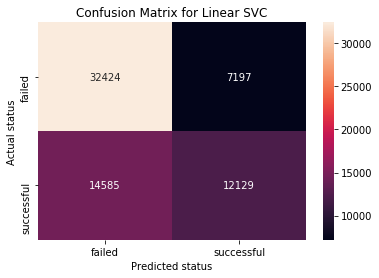

In [121]:
# best confusion matrix depiction using seaborn heatmap
class_names = y_val.unique()
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Confusion Matrix for Linear SVC')

In [122]:
# classification report with relevant statistics
cr = classification_report(y_val, predictions)
print(cr)

              precision    recall  f1-score   support

      failed       0.69      0.82      0.75     39621
  successful       0.63      0.45      0.53     26714

   micro avg       0.67      0.67      0.67     66335
   macro avg       0.66      0.64      0.64     66335
weighted avg       0.66      0.67      0.66     66335



In [ ]:
# print("Log loss: ", log_loss(y_val, probabilities))

In [ ]:
# get probabilities for the positive class (second column in probabilities)
positive_probabilities = probabilities[:,1]
# is over 0.5 - which is the standard for a no-skill model
print("ROC_AUC score: ", roc_auc_score(y_val.cat.codes, positive_probabilities))

In [ ]:
# our dataset is balanced - this one is better
# plot ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fpr, tpr, thresholds = roc_curve(y_val.cat.codes, positive_probabilities)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

In [ ]:
# plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val.cat.codes, positive_probabilities)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
# show the plot
plt.show()